In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-preprocessed/X_train
/kaggle/input/titanic-preprocessed/X_test
/kaggle/input/titanic-preprocessed/y_train


In [86]:
X_train = pd.read_csv(os.path.join(dirname, filenames[0]))
X_test = pd.read_csv(os.path.join(dirname, filenames[1]))
y_train = pd.read_csv(os.path.join(dirname, filenames[2]))

In [87]:
X_train.head()

,PassengerId,Sex,SibSp,Parch,Age Imp,Fare Imp,P2,P3
0,1,1,1,0,0.271174,0.014151,0.0,1.0
1,2,0,1,0,0.472229,0.139136,0.0,0.0
2,3,0,0,0,0.321438,0.015469,0.0,1.0
3,4,0,1,0,0.434531,0.103644,0.0,0.0
4,5,1,0,0,0.434531,0.015713,0.0,1.0


In [88]:
X_test.head()

,PassengerId,Sex,SibSp,Parch,Age Imp,Fare Imp,P2,P3
0,892,1,0,0,0.428248,0.015282,0.0,1.0
1,893,0,1,0,0.585323,0.013663,0.0,1.0
2,894,1,0,0,0.773813,0.018909,1.0,0.0
3,895,1,0,0,0.334004,0.016908,0.0,1.0
4,896,0,1,1,0.271174,0.023984,0.0,1.0


In [89]:
y_train.head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [90]:
X_train.set_index('PassengerId', inplace = True)
y_train.set_index('PassengerId', inplace = True)
X_test.set_index('PassengerId', inplace = True)

y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [91]:
y_train.shape

(891, 1)

KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt

In [93]:
xtrn, xval, ytrn, yval = train_test_split(X_train, y_train['Survived'], test_size = 0.3, stratify = y_train)

In [94]:
ytrn.shape

(623,)

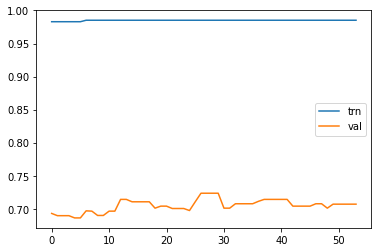

f1_trn:  0.985200845665962 6 [3. 1.] 
 f1_val:  0.7236180904522612 26 [6. 3.]
0.985200845665962 0.6969696969696969


In [95]:

krange = range(2,11)
prange = range(1,7)
f1_trn = []
f1_val = []
knncm = []

itr=0
param = np.zeros((len(krange)*len(prange),2))

for k in krange:
    for p in prange:
        
        knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = p)
        
        knn_model.fit(xtrn,ytrn)
        
        ypred = knn_model.predict(xtrn)
        f1_trn.append(f1_score(ytrn, ypred))
        
        ypred = knn_model.predict(xval)
        f1_val.append(f1_score(yval, ypred))
        
        param[itr,:] = [k,p]
        itr+=1

        
plt.plot(f1_trn)
plt.plot(f1_val)

plt.legend(['trn','val'])   
plt.show()

print('f1_trn: ',np.max(f1_trn),np.argmax(f1_trn),param[np.argmax(f1_trn),:],'\n','f1_val: ',np.max(f1_val),np.argmax(f1_val),param[np.argmax(f1_val),:])

print(f1_trn[np.argmax(f1_val)], f1_val[np.argmax(f1_trn)])



In [96]:
knn_model = KNeighborsClassifier(n_neighbors=int(param[np.argmax(f1_val),0]), weights = 'distance', p = (param[np.argmax(f1_val),1]))
knn_model.fit(xtrn, ytrn)
ypred = knn_model.predict(xval)
cm = confusion_matrix(yval, ypred)

print(cm, param[np.argmax(f1_val),:])

[[141  24]
 [ 31  72]] [6. 3.]


In [97]:
knn_model = KNeighborsClassifier(n_neighbors=int(param[np.argmax(f1_val),0]), weights = 'distance', p = (param[np.argmax(f1_val),1]))
knn_model.fit(X_train, y_train['Survived'])

ypred = knn_model.predict(X_test)

In [98]:
knn_pred = pd.DataFrame()
knn_pred['PassengerId'] = X_test.index
knn_pred.set_index( 'PassengerId', inplace = True)
knn_pred['Survived'] = ypred
knn_pred.head()

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,0


In [99]:
knn_pred.to_csv(r'Prediction_knn1.csv')

In [100]:
X_train.columns

Index(['Sex', 'SibSp', 'Parch', 'Age Imp', 'Fare Imp', 'P2', 'P3'], dtype='object')

In [101]:
#No Fare Imp

xtrn, xval, ytrn, yval = train_test_split(X_train[['Sex', 'SibSp', 'Parch', 'Age Imp', 'P2', 'P3']], y_train['Survived'], test_size = 0.3, stratify = y_train)

krange = range(2,11)
prange = range(1,7)
f1_trn = []
f1_val = []
knncm = []

itr=0
param = np.zeros((len(krange)*len(prange),2))

for k in krange:
    for p in prange:
        
        knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = p)
        
        knn_model.fit(xtrn,ytrn)
        
        ypred = knn_model.predict(xtrn)
        f1_trn.append(f1_score(ytrn, ypred))
        
        ypred = knn_model.predict(xval)
        f1_val.append(f1_score(yval, ypred))
        
        param[itr,:] = [k,p]
        itr+=1

             

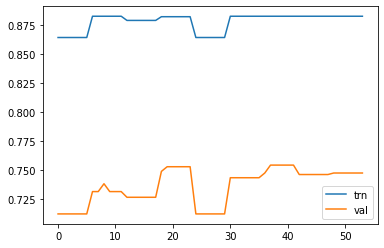

In [102]:

plt.plot(f1_trn)
plt.plot(f1_val)

plt.legend(['trn','val'])

In [105]:
print('f1_trn: ',np.max(f1_trn),np.argmax(f1_trn),param[np.argmax(f1_trn),:],'\n','f1_val: ',np.max(f1_val),np.argmax(f1_val),param[np.argmax(f1_val),:])

f1_trn:  0.8828828828828829 6 [3. 1.] 
 f1_val:  0.7540983606557378 37 [8. 2.]


In [109]:
f1_trn[np.argmax(f1_val)], f1_val[np.argmax(f1_trn)]

(0.8828828828828829, 0.7311827956989247)

In [110]:
knn_model = KNeighborsClassifier(n_neighbors=int(param[np.argmax(f1_val),0]), weights = 'distance', p = (param[np.argmax(f1_val),1]))
knn_model.fit(xtrn, ytrn)
ypred = knn_model.predict(xval)
cm = confusion_matrix(yval, ypred)

print(cm, param[np.argmax(f1_val),:])

[[154  11]
 [ 34  69]] [8. 2.]


In [111]:
knn_model = KNeighborsClassifier(n_neighbors=int(param[np.argmax(f1_val),0]), weights = 'distance', p = (param[np.argmax(f1_val),1]))
knn_model.fit(X_train[['Sex', 'SibSp', 'Parch', 'Age Imp', 'P2', 'P3']], y_train['Survived'])

ypred = knn_model.predict(X_test[['Sex', 'SibSp', 'Parch', 'Age Imp', 'P2', 'P3']])

knn_pred = pd.DataFrame()
knn_pred['PassengerId'] = X_test.index
knn_pred.set_index( 'PassengerId', inplace = True)
knn_pred['Survived'] = ypred
knn_pred.head()


knn_pred.to_csv(r'Prediction_knn2.csv')

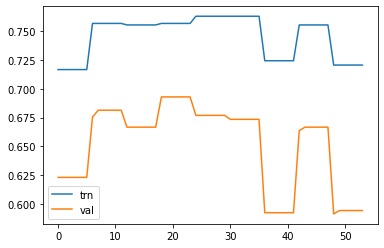

f1_trn:  0.7632183908045977 24 [6. 1.] 
 f1_val:  0.6929824561403508 18 [5. 1.]
0.7569721115537849 0.676923076923077


In [112]:
#No Fare, Age

xtrn, xval, ytrn, yval = train_test_split(X_train[['Sex', 'SibSp', 'Parch', 'P2', 'P3']], y_train['Survived'], test_size = 0.3, stratify = y_train)

krange = range(2,11)
prange = range(1,7)
f1_trn = []
f1_val = []
knncm = []

itr=0
param = np.zeros((len(krange)*len(prange),2))

for k in krange:
    for p in prange:
        
        knn_model = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = p)
        
        knn_model.fit(xtrn,ytrn)
        
        ypred = knn_model.predict(xtrn)
        f1_trn.append(f1_score(ytrn, ypred))
        
        ypred = knn_model.predict(xval)
        f1_val.append(f1_score(yval, ypred))
        
        param[itr,:] = [k,p]
        itr+=1

        
plt.plot(f1_trn)
plt.plot(f1_val)

plt.legend(['trn','val'])   
plt.show()

print('f1_trn: ',np.max(f1_trn),np.argmax(f1_trn),param[np.argmax(f1_trn),:],'\n','f1_val: ',np.max(f1_val),np.argmax(f1_val),param[np.argmax(f1_val),:])

print(f1_trn[np.argmax(f1_val)], f1_val[np.argmax(f1_trn)])


In [113]:
knn_model = KNeighborsClassifier(n_neighbors=int(param[np.argmax(f1_val),0]), weights = 'distance', p = (param[np.argmax(f1_val),1]))
knn_model.fit(xtrn, ytrn)
ypred = knn_model.predict(xval)
cm = confusion_matrix(yval, ypred)

print(cm, param[np.argmax(f1_val),:])

[[119  46]
 [ 24  79]] [5. 1.]


In [114]:
knn_model = KNeighborsClassifier(n_neighbors=int(param[np.argmax(f1_val),0]), weights = 'distance', p = (param[np.argmax(f1_val),1]))
knn_model.fit(X_train[['Sex', 'SibSp', 'Parch', 'P2', 'P3']], y_train['Survived'])

ypred = knn_model.predict(X_test[['Sex', 'SibSp', 'Parch', 'P2', 'P3']])

knn_pred = pd.DataFrame()
knn_pred['PassengerId'] = X_test.index
knn_pred.set_index( 'PassengerId', inplace = True)
knn_pred['Survived'] = ypred
knn_pred.head()


knn_pred.to_csv(r'Prediction_knn3.csv')